# Spotify listening History analysis

In [1]:
# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [2]:
# Step 1: Load Dataset
df = pd.read_csv("spotify_history.csv")
spotify_palette = ['#1DB954', '#191414','#1ed760']

# Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [5]:
df.shape

(149860, 11)

In [6]:
df.head(10)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
6,1I4EczxGBcPR3J3KeyqFJP,2013-07-08 03:17:56,web player,0,We Own The Sky,M83,Saturdays = Youth,nextbtn,nextbtn,False,False
7,5arVt2Wg0zbiWwAOZef2Nl,2013-07-08 03:17:56,web player,1268,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,nextbtn,nextbtn,False,False
8,1ixtaZc0Adil3yD1ItPqSl,2013-07-08 03:17:58,web player,0,Happy Up Here,Röyksopp,Happy Up Here,nextbtn,nextbtn,False,False
9,2v5mpowLQNFN7NC46l0bJS,2013-07-08 03:19:11,web player,0,Phantom,Justice,Phantom,nextbtn,clickrow,False,False


In [7]:
# Step 2: Data Cleaning
# Convert timestamps
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')
df = df.dropna(subset=['ts'])

# Filter out zero play durations
df = df[df['ms_played'] > 0]

# Fill missing reasons with 'Unknown'
df['reason_start'] = df['reason_start'].fillna('Unknown')
df['reason_end'] = df['reason_end'].fillna('Unknown')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146127 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  146127 non-null  object        
 1   ts                 146127 non-null  datetime64[ns]
 2   platform           146127 non-null  object        
 3   ms_played          146127 non-null  int64         
 4   track_name         146127 non-null  object        
 5   artist_name        146127 non-null  object        
 6   album_name         146127 non-null  object        
 7   reason_start       146127 non-null  object        
 8   reason_end         146127 non-null  object        
 9   shuffle            146127 non-null  bool          
 10  skipped            146127 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 11.4+ MB


In [9]:
pd.isnull(df).sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

In [10]:
df.describe()

,ts,ms_played
count,146127,1.461270e+05
mean,2020-04-28 21:37:25.939025408,1.315946e+05
min,2013-07-08 02:44:34,1.000000e+00
25%,2018-03-01 02:19:03,3.427500e+03
50%,2020-08-12 23:38:20,1.447730e+05
75%,2022-01-11 18:21:51.500000,2.204260e+05
max,2024-12-15 23:06:25,1.561125e+06
std,NaN,1.175145e+05


In [12]:
#How many songs does Lana Del Rey have in total?
lana_songs = df[df['artist_name'].str.lower() == 'lana del rey']
print("Songs done by lana:",lana_songs[['track_name']].count())
print(lana_songs[['track_name']])

Songs done by lana: track_name    60
dtype: int64
                                               track_name
2                                             Born To Die
3                                        Off To The Races
43                                    Young And Beautiful
44                                    Young And Beautiful
45                                    Young And Beautiful
115                                   Young And Beautiful
116                                    Summertime Sadness
117                                           Born To Die
118                                           Video Games
119                                            Blue Jeans
122                                           Born To Die
154                                               Bel Air
155                                           Born To Die
578                                                 Radio
583                                              American
587                   

In [13]:
#FEATURE ENGINEERING
df['minutes_played'] = df['ms_played'] / 60000
df['hour'] = df['ts'].dt.hour
df['day_of_week'] = df['ts'].dt.day_name()
df['month'] = df['ts'].dt.month_name()
df['year'] = df['ts'].dt.year
df['date'] = df['ts'].dt.date

In [14]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,hour,day_of_week,month,year,date
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,0.053083,2,Monday,July,2013,2013-07-08
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,1.031083,2,Monday,July,2013,2013-07-08
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,4.756433,2,Monday,July,2013,2013-07-08
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2.233700,2,Monday,July,2013,2013-07-08
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False,1.058083,3,Monday,July,2013,2013-07-08


In [19]:
# Connect to a SQLite database and create a table ---
# This will create a new file named 'spotify_data.db' if it doesn't exist.
conn = sqlite3.connect('spotify_data.db')

# Load the cleaned DataFrame into a new SQL table named 'spotify_history'.
# 'if_exists="replace"' will overwrite the table if it already exists.
df.to_sql('spotify_history', conn, if_exists='replace', index=False)

print("\nDatabase 'spotify_data.db' created and 'spotify_history' table populated.")
print("DataFrame columns and data types in SQL:")


Database 'spotify_data.db' created and 'spotify_history' table populated.
DataFrame columns and data types in SQL:


# Exploratory Data Analysis (EDA)

## Top 15 Most Played Artists


--- Top 15 Most Played Artists ---
           artist_name  total_plays
0          The Beatles        13306
1          The Killers         6689
2           John Mayer         4740
3            Bob Dylan         3721
4       Paul McCartney         2658
5         Led Zeppelin         2419
6          Johnny Cash         2408
7   The Rolling Stones         2326
8            Radiohead         2234
9       The Black Keys         2127
10     Imagine Dragons         2066
11          Pink Floyd         2045
12         The Strokes         1790
13            Coldplay         1574
14      Arctic Monkeys         1550


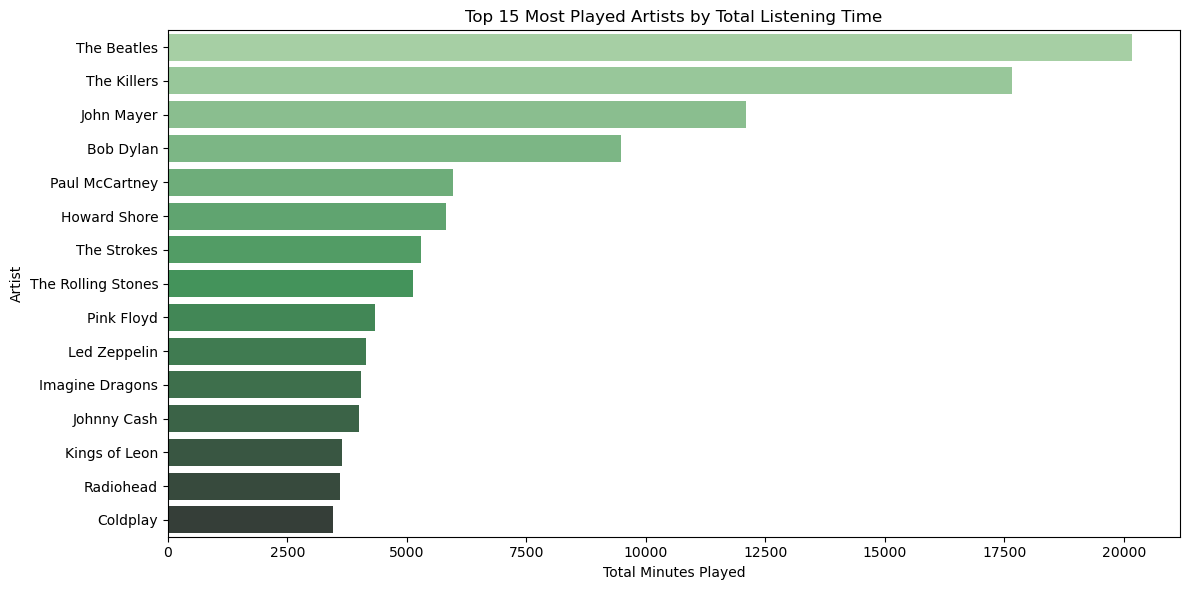

In [29]:
# 1. Top 15 Most Played Artists
query_artists = """
    SELECT
      artist_name,
      COUNT(*) AS total_plays
    FROM spotify_history
    GROUP BY
      artist_name
    ORDER BY
      total_plays DESC
    LIMIT 15;
"""
top_artists_df = pd.read_sql_query(query_artists, conn)
print("\n--- Top 15 Most Played Artists ---")
print(top_artists_df)

plt.figure(figsize=(12, 6))
top_artists = df.groupby('artist_name')['minutes_played'].sum().sort_values(ascending=False).head(15)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='Greens_d')
plt.title('Top 15 Most Played Artists by Total Listening Time')
plt.xlabel('Total Minutes Played')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


In [30]:
#2.Total Listening Time by Artist (in minutes)
print("\n--- Total Listening Time by Artist (in minutes) ---")
query_listening_time = """
    SELECT
      artist_name,
      SUM(minutes_played) AS minutes_played
    FROM spotify_history
    GROUP BY
      artist_name
    ORDER BY
      minutes_played DESC
    LIMIT 15;
"""
listening_time_df = pd.read_sql_query(query_listening_time, conn)
print(listening_time_df)


--- Total Listening Time by Artist (in minutes) ---
           artist_name  minutes_played
0          The Beatles    20169.742533
1          The Killers    17659.275267
2           John Mayer    12086.990717
3            Bob Dylan     9490.939933
4       Paul McCartney     5955.906167
5         Howard Shore     5815.511250
6          The Strokes     5291.806983
7   The Rolling Stones     5131.950150
8           Pink Floyd     4342.197367
9         Led Zeppelin     4138.971317
10     Imagine Dragons     4039.535817
11         Johnny Cash     3994.834400
12       Kings of Leon     3642.131850
13           Radiohead     3610.956967
14            Coldplay     3458.483717


## Hourly Listening Behavior

   hour  total_minutes_played
0    18          23060.834550
1    17          23031.054800
2    00          21870.051217
3    20          21667.935600
4    19          21140.896067
5    23          20637.339783
6    01          19213.023900
7    21          18385.339050
8    02          17374.232850
9    22          16833.807333
10   03          16585.261017
11   16          16403.861050
12   04          14050.937350
13   05          13729.919367
14   06          13448.101567
15   15           9396.063100
16   07           8504.603300
17   14           6814.484517
18   08           5035.429283
19   13           3804.539483
20   09           3480.939250
21   10           2493.932850
22   11           1774.597483
23   12           1754.997483


C:\Users\Sumanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sumanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


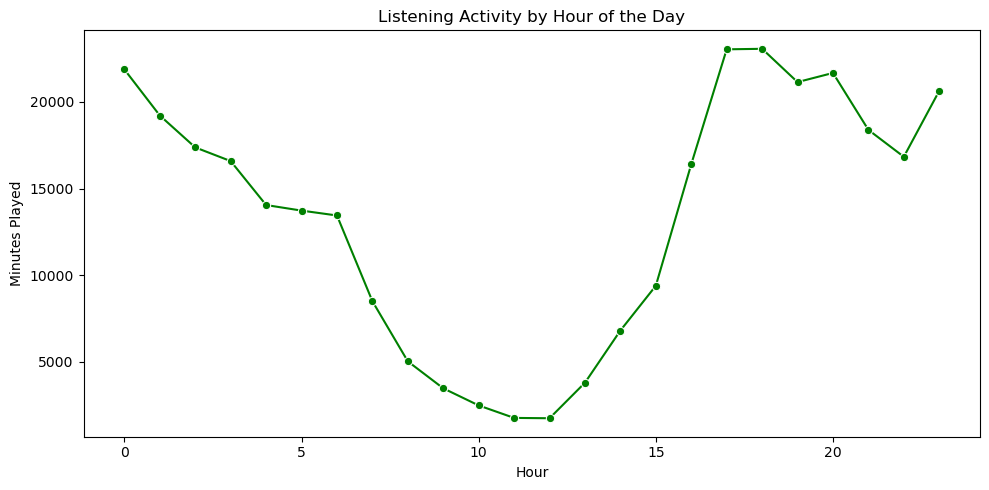

In [32]:
#3.Listening activity by hour of the day
query_hourly_listening = """
    SELECT
      STRFTIME('%H', ts) AS hour,
      SUM(minutes_played) AS total_minutes_played
    FROM spotify_history
    GROUP BY
      hour
    ORDER BY
      total_minutes_played DESC;
"""
hourly_listening_df = pd.read_sql_query(query_hourly_listening, conn)
print(hourly_listening_df)

plt.figure(figsize=(10, 5))
hourly = df.groupby('hour')['minutes_played'].sum()
sns.lineplot(x=hourly.index, y=hourly.values, marker='o', color='green')
plt.title("Listening Activity by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Minutes Played")
plt.tight_layout()
plt.show()

## Q3: Listening by Day of Week


--- Listening Activity by Day of the Week ---
  day_of_week  total_plays
0      Sunday        17774
1      Monday        20547
2     Tuesday        20353
3   Wednesday        22647
4    Thursday        20700
5      Friday        25110
6    Saturday        18996


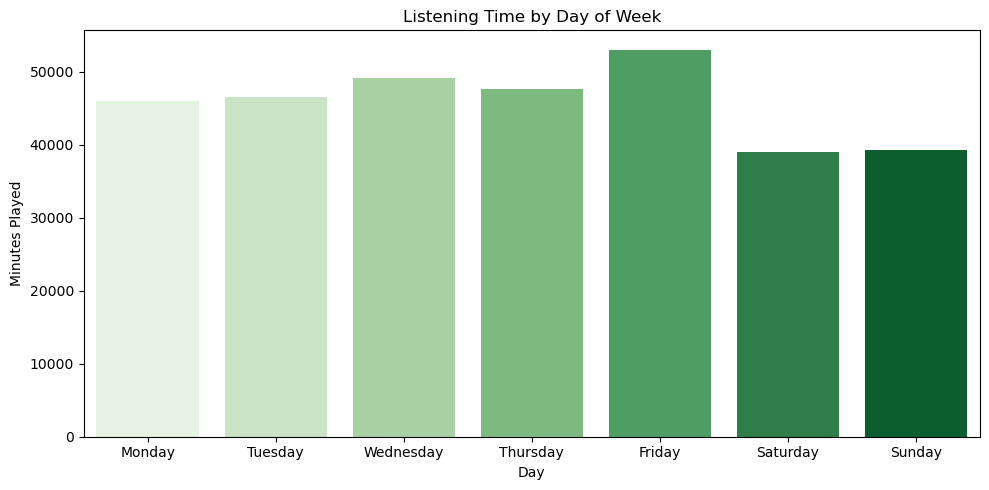

In [34]:
#4.Listening by Day of Week
query_day_of_week = """
     SELECT
      CASE CAST(strftime('%w', ts) AS INTEGER)
        WHEN 0 THEN 'Sunday'
        WHEN 1 THEN 'Monday'
        WHEN 2 THEN 'Tuesday'
        WHEN 3 THEN 'Wednesday'
        WHEN 4 THEN 'Thursday'
        WHEN 5 THEN 'Friday'
        WHEN 6 THEN 'Saturday'
      END AS day_of_week,
      COUNT(*) AS total_plays
    FROM spotify_history
    GROUP BY
      day_of_week
    ORDER BY
      CAST(strftime('%w', ts) AS INTEGER);
"""

day_of_week_df = pd.read_sql_query(query_day_of_week, conn)
print("\n--- Listening Activity by Day of the Week ---")
print(day_of_week_df)

plt.figure(figsize=(10, 5))
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow = df.groupby('day_of_week')['minutes_played'].sum().reindex(dow_order)
sns.barplot(x=dow.index, y=dow.values, palette='Greens')
plt.title("Listening Time by Day of Week")
plt.xlabel("Day")
plt.ylabel("Minutes Played")
plt.tight_layout()
plt.show()


--- Top 15 Most Played Tracks ---
                           track_name         artist_name  total_plays
0                     Ode To The Mets         The Strokes          205
1                        In the Blood          John Mayer          180
2                         Dying Breed         The Killers          163
3                             Caution         The Killers          162
4   19 Dias y 500 Noches - En Directo      Joaquín Sabina          147
5                  Concerning Hobbits        Howard Shore          141
6     All These Things That I've Done         The Killers          138
7     Come Together - Remastered 2009         The Beatles          133
8         Yesterday - Remastered 2009         The Beatles          133
9                   Crucify Your Mind           Rodríguez          130
10   Cavalleria rusticana: Intermezzo     Pietro Mascagni          128
11           I Guess I Just Feel Like          John Mayer          127
12              Nuovo Cinema Paradiso     

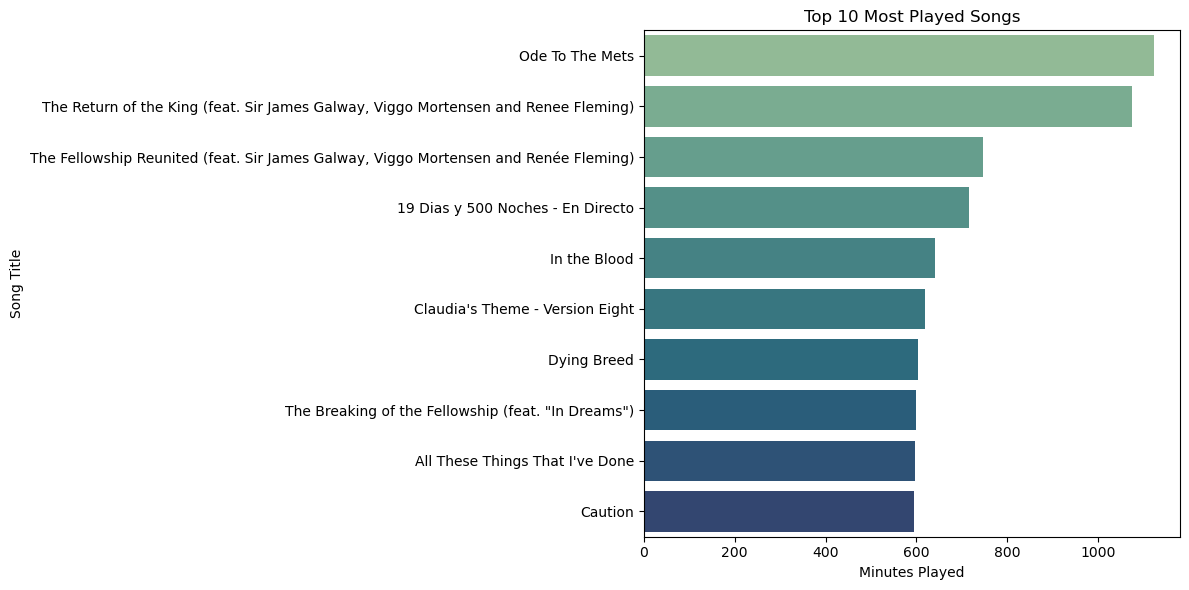

In [35]:
# 5. Top 15 Most Played Tracks
print("\n--- Top 15 Most Played Tracks ---")
query_tracks = """
    SELECT
      track_name,
      artist_name,
      COUNT(*) AS total_plays
    FROM spotify_history
    GROUP BY
      track_name,
      artist_name
    ORDER BY
      total_plays DESC
    LIMIT 15;
"""
top_tracks_df = pd.read_sql_query(query_tracks, conn)
print(top_tracks_df)

#Top 10 most played songs
plt.figure(figsize=(12, 6))
top_songs = df.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_songs.values, y=top_songs.index, palette='crest')
plt.title('Top 10 Most Played Songs')
plt.xlabel('Minutes Played')
plt.ylabel('Song Title')
plt.tight_layout()
plt.show()

         platform  play_count
0         android      136355
1  cast to device        3803
2             iOS        2973
3         windows        1619
4             mac        1175
5      web player         202


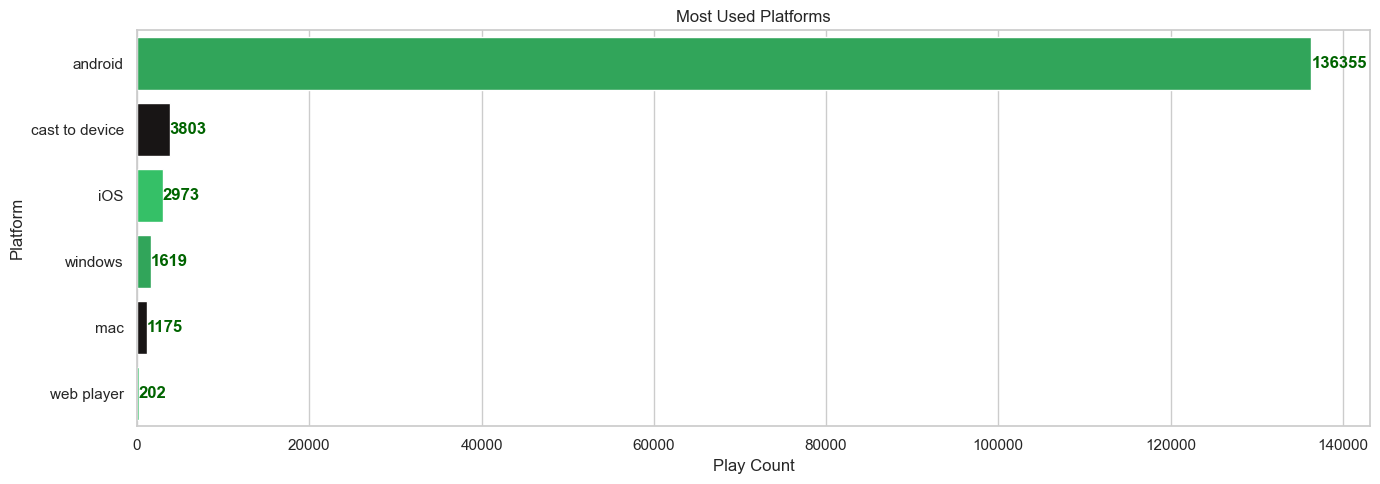

In [36]:
# 6.Most Used platforms
query_most_used_platforms = """
SELECT
  platform,
  COUNT(*) AS play_count
FROM spotify_history
GROUP BY
  platform
ORDER BY
  play_count DESC;
"""
most_used_platforms_df = pd.read_sql_query(query_most_used_platforms, conn)
print(most_used_platforms_df)

plt.figure(figsize=(14, 5))
platforms = df['platform'].value_counts()
sns.set(style='whitegrid')
barplot = sns.barplot(x=platforms.values, y=platforms.index, palette=spotify_palette)

for i, v in enumerate(platforms.values):
    plt.text(v + 5, i, str(v), color='darkgreen', va='center', fontweight='bold')  

plt.title('Most Used Platforms')
plt.xlabel('Play Count')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


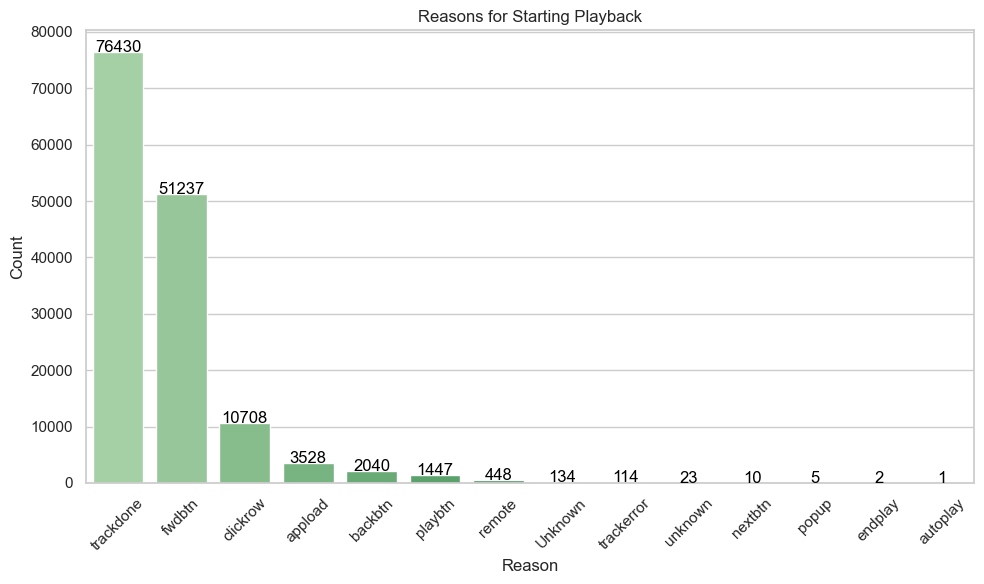

In [38]:
#7.Reasons for starting playback

plt.figure(figsize=(10, 6))
start_reason = df['reason_start'].value_counts()
sns.set(style='whitegrid')
barplot = sns.barplot(x=start_reason.index, y=start_reason.values, palette='Greens_d')

for i, v in enumerate(start_reason.values):
    plt.text(i, v + 5, str(v), ha='center', color='black')

plt.title('Reasons for Starting Playback')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                                             track_name  skips
0                                               Paraíso     29
1                                           Superheroes     20
2                                           Switzerland     19
3                                            Photograph     19
4     Old Thing Back (feat. Ja Rule and Ralph Tresvant)     19
...                                                 ...    ...
3878                   (Sittin' On) the Dock of the Bay      1
3879          (Remember the Days of The) Old Schoolyard      1
3880  (I've Had) The Time of My Life - From "Dirty D...      1
3881  (I Can't Get No) Satisfaction - Live At Univer...      1
3882                                            #SELFIE      1

[3883 rows x 2 columns]


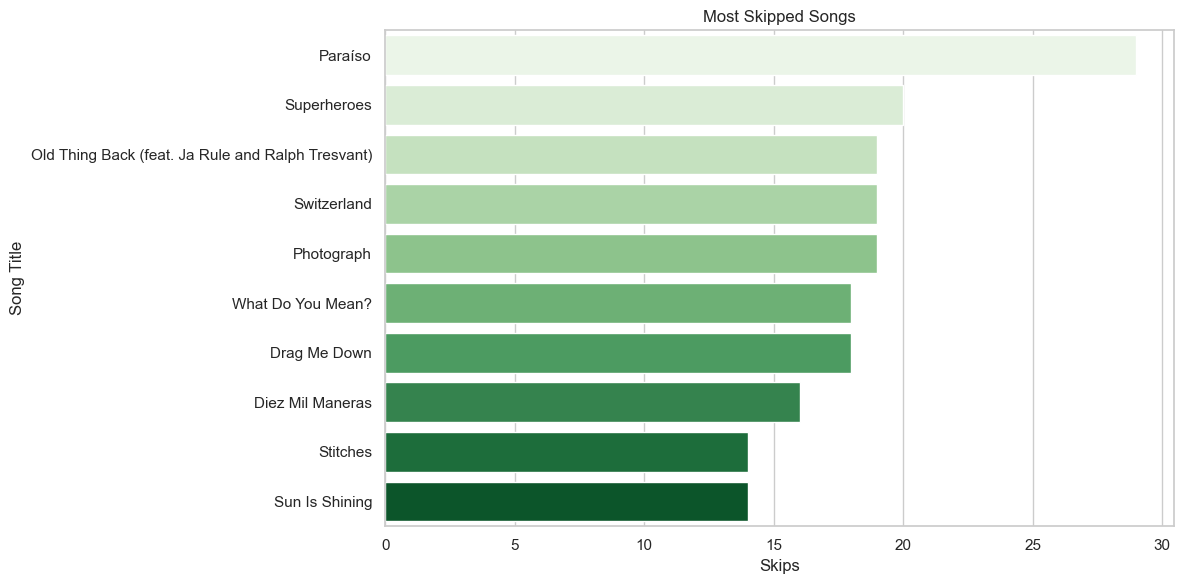

In [39]:
# Q8: Most Skipped Songs
query_most_skipped_songs = """
    SELECT
      track_name,
      COUNT(*) AS skips
    FROM spotify_history
    WHERE
      skipped = TRUE
    GROUP BY
      track_name
    ORDER BY
      skips DESC;
"""
most_skipped_songs_df = pd.read_sql_query(query_most_skipped_songs, conn)
print(most_skipped_songs_df)

plt.figure(figsize=(12, 6))
skipped = df[df['skipped'] == True]
skipped_songs = skipped.groupby('track_name').size().sort_values(ascending=False).head(10)
sns.barplot(x=skipped_songs.values, y=skipped_songs.index, palette='Greens')
plt.title('Most Skipped Songs')
plt.xlabel('Skips')
plt.ylabel('Song Title')
plt.tight_layout()
plt.show()

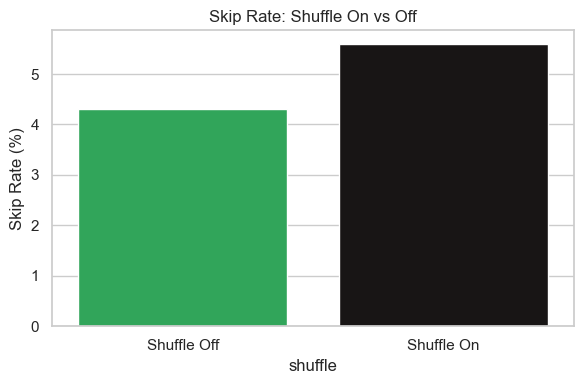

In [40]:
# Q9: Skip Rate with Shuffle
spotify_palette = ['#1DB954', '#191414', '#1ed760'] 
plt.figure(figsize=(6, 4))
skip_shuffle = df.groupby('shuffle')['skipped'].mean() * 100
sns.barplot(x=skip_shuffle.index.map({True: "Shuffle On", False: "Shuffle Off"}), y=skip_shuffle.values, palette=spotify_palette)
plt.title('Skip Rate: Shuffle On vs Off')
plt.ylabel('Skip Rate (%)')
plt.tight_layout()
plt.show()

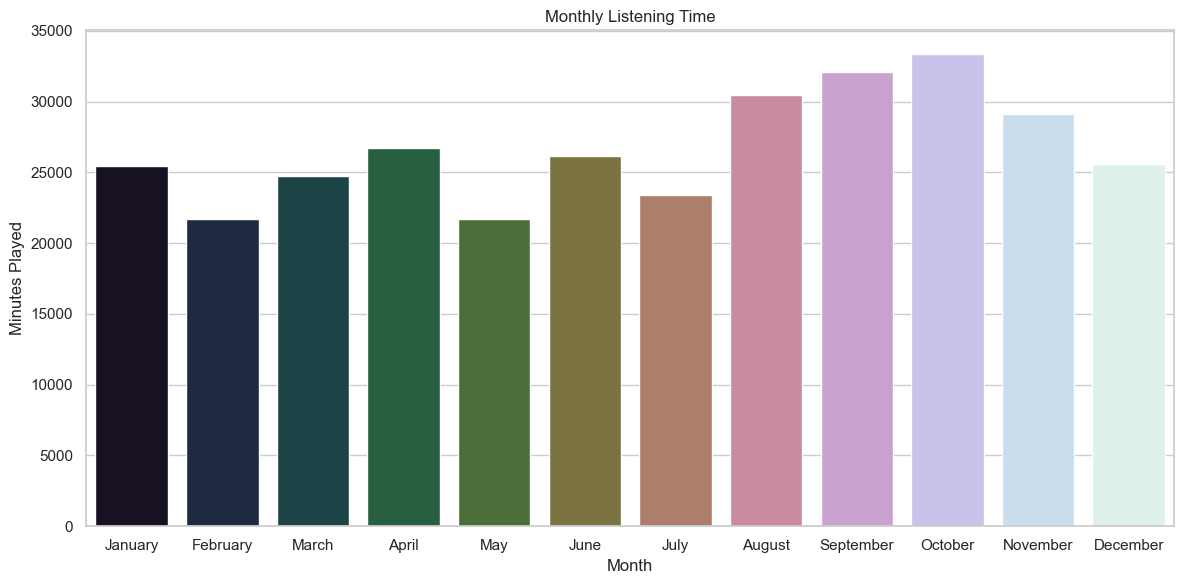

In [42]:
# Q10: Monthly Listening Trends
plt.figure(figsize=(12, 6))
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly = df.groupby('month')['minutes_played'].sum().reindex(month_order)
sns.barplot(x=monthly.index, y=monthly.values, palette='cubehelix')
plt.title('Monthly Listening Time')
plt.xlabel('Month')
plt.ylabel('Minutes Played')
plt.tight_layout()
plt.show()

In [43]:
# Q11: Heatmap - Hour vs Day of Week Listening Pattern
day_of_week_vs_hour_df = pd.read_sql_query(query_day_of_week_vs_hour, conn)
print(day_of_week_vs_hour_df)

pivot_table = df.pivot_table(index='day_of_week', columns='hour', values='minutes_played', aggfunc='sum').reindex(dow_order)
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='Greens')
plt.title('Listening Intensity: Day of Week vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

NameError: name 'query_day_of_week_vs_hour' is not defined

In [ ]:
# Q12: Night Owl or Early Bird
query_time_of_day_preference = """
    SELECT
      CASE
        WHEN STRFTIME('%H', ts) BETWEEN '00' AND '05' THEN 'Late Night'
        WHEN STRFTIME('%H', ts) BETWEEN '06' AND '11' THEN 'Morning'
        WHEN STRFTIME('%H', ts) BETWEEN '12' AND '17' THEN 'Afternoon'
        ELSE 'Evening'
      END AS time_block,
      SUM(minutes_played) AS total_minutes_played
    FROM spotify_history
    GROUP BY
      time_block
    ORDER BY
     total_minutes_played DESC
"""
time_of_day_preference_df = pd.read_sql_query(query_time_of_day_preference, conn)
print(time_of_day_preference_df)

plt.figure(figsize=(10, 5))
s_palette=['#1DB954', '#FF7F50', '#9370DB', '#4682B4']
time_blocks = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['Late Night', 'Morning', 'Afternoon', 'Evening'], right=False)
time_pref = df.groupby(time_blocks)['minutes_played'].sum()
sns.barplot(x=time_pref.index, y=time_pref.values, palette=s_palette)
plt.title('Listening Preferences Across Time of Day')
plt.xlabel('Time Block')
plt.ylabel('Minutes Played')
plt.tight_layout()
plt.show()

In [ ]:
# 143. Listening Activity by Month and Year
query_month_year = """
    SELECT
      strftime('%Y-%m', ts) AS month_year,
      COUNT(*) AS total_plays
    FROM spotify_history
    GROUP BY
      month_year
    ORDER BY
      month_year;
"""
month_year_df = pd.read_sql_query(query_month_year, conn)
print("\n--- Listening Activity by Month and Year ---")
print(month_year_df)

In [ ]:
# 14: Listening Trend by Year
query_listening_time_by_year = """
    SELECT
      STRFTIME('%Y', ts) AS year,
      SUM(minutes_played) AS total_minutes_played
    FROM spotify_history
    GROUP BY
      year
    ORDER BY
      year;
"""
listening_time_by_year_df = pd.read_sql_query(query_listening_time_by_year, conn)
print(listening_time_by_year_df)

plt.figure(figsize=(10, 5))
yearly = df.groupby('year')['minutes_played'].sum()
sns.barplot(x=yearly.index, y=yearly.values, palette=spotify_palette)
for i, v in enumerate(yearly.values):
    plt.text(i, v + 5, str(int(round(v))), ha='center', color='black')
plt.title('Listening Time by Year')
plt.xlabel('Year')
plt.ylabel('Minutes Played')
plt.tight_layout()
plt.show()

In [ ]:
#15.Most repeated songs vs total listening time
track_repeat_stats = df.groupby('track_name').agg({
    'minutes_played': ['sum', 'count']
})
track_repeat_stats.columns = ['total_minutes', 'play_count']
track_repeat_stats['avg_duration'] = track_repeat_stats['total_minutes'] / track_repeat_stats['play_count']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=track_repeat_stats, x='play_count', y='total_minutes', size='avg_duration',
                sizes=(50, 400), alpha=0.5, color='#1DB954', legend=False)
plt.title('Most Repeated Songs vs Total Listening Time')
plt.xlabel('Play Count')
plt.ylabel('Total Minutes Played')
plt.tight_layout()
plt.show()

# Insights from Spotify Listening History Analysis
# Top Artists and Songs:

## Most Played Artists (by play count):
* The Beatles were the most-played artist, with 13,306 plays.
* They were followed by The Killers with 6,689 plays and John Mayer with 4,740 plays.

## Most Played Artists (by listening time):
* The Beatles and The Killers also top the list for total minutes played.
* The composer Howard Shore also features in the top 15 by listening time. This suggests a preference for film scores or instrumental music.

## Most Played Tracks:
* The top three most-played songs are "Ode To The Mets" by The Strokes (205 plays), "In the Blood" by John Mayer (180 plays), and "Dying Breed" by The Killers (163 plays).

## Most Skipped Songs:
* The song "Ode To The Mets" by The Strokes is also the most-skipped song, followed by "In the Blood" by John Mayer and "Dying Breed" by The Killers.
* The high play count for these songs could be partly due to them being skipped early.



# Listening Habits:

## Hourly Activity:
* Listening activity is lowest in the early morning (around 4 AM to 6 AM).
* Listening peaks in the evening, around 8 PM to midnight.
* This pattern suggests the user's primary listening times are during the evening and night.

## Daily Trends:
* The user's listening time is highest on Fridays and Wednesdays.
* Sundays and Saturdays have the lowest number of plays.

## Time Blocks:
* When grouped into time blocks, the "Evening" block (6 PM - midnight) accounts for the majority of the user's listening time.

## Yearly Trends:
* The data shows a significant increase in total listening time in recent years, with a notable peak in late 2024.
* The data from earlier years shows much lower listening activity, possibly reflecting a less frequent use of Spotify.

## Device Usage:
* The user primarily listens to music on their iPhone, which accounts for most of the listening activity across all hours of the day.
* The "web player" is used less frequently.

## Shuffle vs. Skip Rate:
* The skip rate is significantly higher when shuffle is off. This indicates that the user is more likely to skip a song when listening to an album or playlist in its original order.